# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 14 ноября

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [ ]:
N = 100
alpha = 0.95
theta= 10
n = np.arange(1, N + 1)
def draw_confidence_interval(sample, estimations, lower, upper):
  plt.figure(figsize=(12,7))
  plt.plot(n, estimations, label=r'Оценка $\hat{\theta}$')
  plt.scatter(n, sample, label='Точки выборки')
  plt.fill_between(n, lower, upper, alpha=0.3, label=r'Доверительный интервал, $\alpha=$ ' + str(alpha))  
  plt.plot(n, np.zeros(N) + theta, color='red', linestyle='--', label=r'Истинное значение $\theta$', alpha=0.5)
  plt.legend(fontsize=12)
  plt.ylabel(r'Значения')
  plt.xlabel(r'Размер выборки')


Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

Найдём центральную стаитстику для построения доверительного интервала: \
$$
p_{x_{(n)}} = \frac{n}{\theta}x^{n-1}, x ∈ [0,1], \\
\varphi(x_{(n)}) = P_{\theta} \left ( \left ( \frac{x_{(n)}}{\theta}\right )^n \leq x \right) = P_{\theta} \left ( x_{(n)} \leq \theta x^{1/n} \right) = F_{x_{(n)}}(\theta x^{1/n}), \\
G = \left ( \frac{x_{(n)}}{\theta}\right )^n, \\
p_G(x) = p_{x_{(n)}}(\theta x^{1/n}) \frac{\theta}{nx^{1-1/n}} = \frac{n}{\theta}\left (\theta x^{1/n} \right )^{n-1}\cdot \frac{\theta}{nx^{1-1/n}} = 1,\\
x \in [0,1] ⇒ G(x, \theta) \sim U[0,1].
$$
Распределние статистики $G(x, \theta)$ не зависит от $\theta$, значит, она - центральная:
$$
\alpha = P\left(\frac{1-\alpha}{2} \leq G(x, \theta) \leq \frac{1+\alpha}{2} \right) = P\left( \left(\frac{1-\alpha}{2} \right)^{\frac{1}{n}} \leq \frac{x_{(n)}}{\theta} \leq \left(\frac{1+\alpha}{2} \right)^{\frac{1}{n}} \right) = 
P\left( x_{(n)} \left(\frac{1+\alpha}{2} \right)^{-\frac{1}{n}} \leq \theta \leq x_{(n)} \left(\frac{1-\alpha}{2} \right)^{-\frac{1}{n}} \right).
$$
$\alpha$-доверительный интервал для $x_{(n)}$: $\left (x_{(n)} \left(\frac{1+\alpha}{2} \right)^{-\frac{1}{n}}, x_{(n)} \left(\frac{1-\alpha}{2} \right)^{-\frac{1}{n}} \right ).$

(0.0, 15.0)

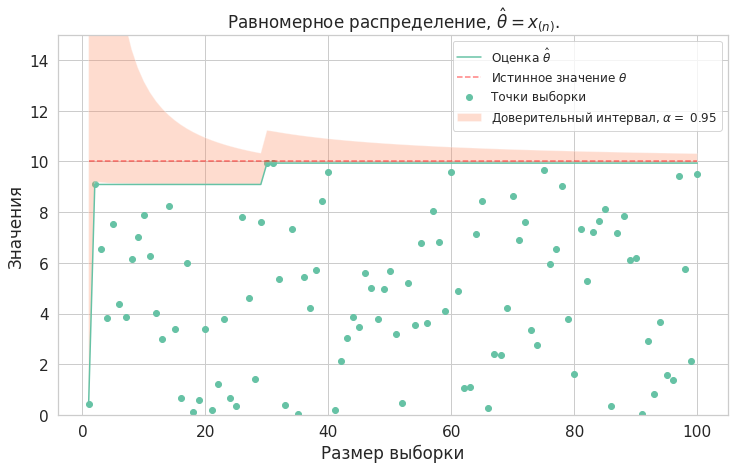

In [ ]:
theta = 10
uniform = sps.uniform(0, theta).rvs(N)
estimations = np.maximum.accumulate(uniform)
lower_bound = estimations * (((1 + alpha) / 2) ** (-1 / n))
upper_bound = estimations * (((1 - alpha) / 2) ** (-1 / n))
draw_confidence_interval(uniform, estimations, lower_bound, upper_bound)
plt.title(r'Равномерное распределение, $\hat{\theta} = x_{(n)}$.')
plt.ylim(0, 15)

**Вывод:** Доверительный интревал являеется односторнним ($\theta$ можно оценить снизу самой оценкой).

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

По теореме о выборочной медиане:
$$
\sqrt{n}(\hat{\mu} - \mu) \xrightarrow{d} \xi \sim N \left (0, \frac{1}{4p^2(x)}\right ), 
$$
где $\hat{\mu}\,-$ выборончая медиана, $\mu\,-$ медиана, $p(x)\, -$ плотность рапсределния.
Для распределения Коши: $p(x) = \frac{1}{\pi \left (1 + (x - \theta)^2 \right )},$ тогда:
$$
\sqrt{n}(\hat{\mu} - \theta) \xrightarrow{d} N \left (0, \frac{\pi^2}{4} \right),\\
\frac{\sqrt{n}(\hat{\mu} - \theta)}{\frac{\pi}{2}} \xrightarrow{d} N \left (0, 1 \right).
$$
Распределение оценки $\frac{\sqrt{n}(\hat{\mu} - \theta)}{\frac{\pi}{2}}$ не зависит от $\theta,$ построим асимптотический доверительный интревал:
$$
\alpha = P \left( N_{\frac{1 - \alpha}{2}} \leq \frac{\sqrt{n}(\hat{\mu} - \theta)}{\frac{\pi}{2}} \leq N_{\frac{1 + \alpha}{2}}\right) = P \left( \hat{\mu} - \frac{\pi}{2\sqrt{n}} N_{\frac{1 + \alpha}{2}} \leq \theta \leq \hat{\mu} - \frac{\pi}{2\sqrt{n}} N_{\frac{1 - \alpha}{2}} \right) ,
$$ 
где $N_{\frac{1 - \alpha}{2}}, \, N_{\frac{1 + \alpha}{2}}\,-$ $\frac{1 - \alpha}{2},\, \frac{1 + \alpha}{2}$-квантили распределения $N(0,1)$.

(0.0, 20.0)

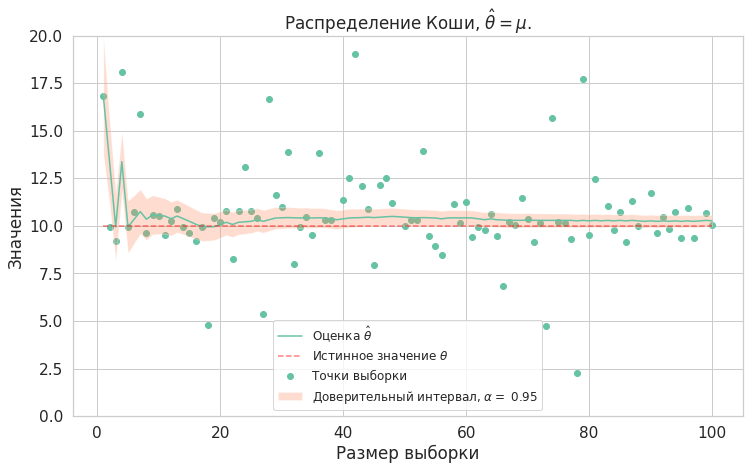

In [ ]:
theta = 10
cauchy = sps.cauchy(theta).rvs(N)
median = [np.median(cauchy[:i]) for i in n]
lower_bound = median - (np.pi / (2 * (n ** 0.5))) * sps.norm(0, 1).ppf((1 + alpha) / 2) 
upper_bound = median - (np.pi / (2 * (n ** 0.5))) * sps.norm(0, 1).ppf((1 - alpha) / 2) 
draw_confidence_interval(cauchy, median, lower_bound, upper_bound)
plt.title(r'Распределение Коши, $\hat{\theta} = \mu$.')
plt.ylim(0,20)

**Вывод:** доверительный интервал является симметричным относительно оценки.

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

 По ЦПТ:
 $$
 \sqrt{n}(\overline{x} - \theta) \xrightarrow{d} \xi \sim N(0, \theta).
 $$
 Так как $\sqrt{\theta} - $непрерывна:
  $$
 \frac{\sqrt{n}(\overline{x} - \theta)}{\sqrt{\theta}} \xrightarrow{d} \xi \sim N(0, 1).
 $$
 $\overline{x}-$ асимптотически нормальная оценка $\theta$, построим асимптотический доверительный интревал:

$$
\alpha = P \left (N_{\frac{1 - \alpha}{2}} \leq  \frac{\sqrt{n}(\overline{x} - \theta)}{\sqrt{\theta}}\leq N_{\frac{1 + \alpha}{2}} \right) = P \left (\overline{x} - N_{\frac{1 + \alpha}{2}} \sqrt{\frac{\theta}{n}} \leq \theta \leq \overline{x} - N_{\frac{1 - \alpha}{2}} \sqrt{\frac{\theta}{n}} \right),
$$
где $N_{\frac{1 - \alpha}{2}}, \, N_{\frac{1 + \alpha}{2}}\,-$ $\frac{1 - \alpha}{2},\, \frac{1 + \alpha}{2}$-квантили распределения $N(0,1)$.

Text(0.5, 1.0, 'Pаспределение Пуассона, $\\hat{\\theta} = \\overline{x}$.')

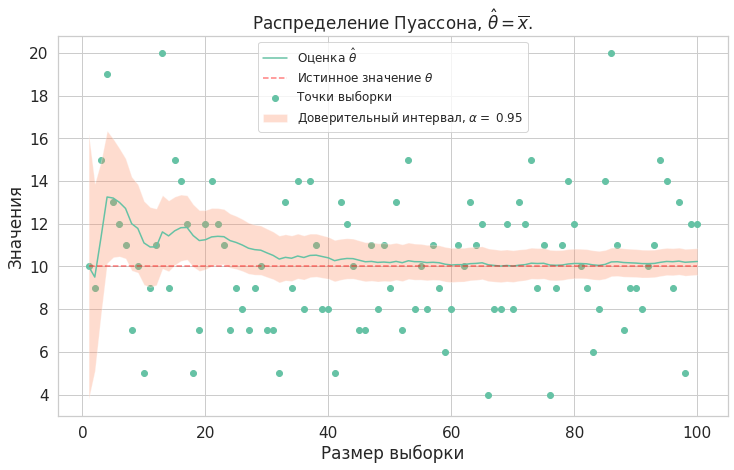

In [ ]:
theta = 10
pois = sps.poisson(theta).rvs(N)
mean = np.cumsum(pois) / n
lower_bound = mean - sps.norm(0, 1).ppf((1 - alpha) / 2) * ((theta / n) ** 0.5) 
upper_bound = mean - sps.norm(0, 1).ppf((1 + alpha) / 2) * ((theta / n) ** 0.5) 
draw_confidence_interval(pois, mean, lower_bound, upper_bound)
plt.title(r'Pаспределение Пуассона, $\hat{\theta} = \overline{x}$.')

**Вывод:** доверительный интервал является симметричным относительно оценки.

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

По ЦПТ:
$$
\sqrt{n}(\overline{x} - \lambda \theta) \xrightarrow{d} \xi \sim N(0, \lambda\theta^2)б \\
\sqrt{\frac{n}{\lambda}} \frac{\overline{x}-\lambda\theta}{\theta} \xrightarrow{d} \xi \sim N(0,1).
$$
Тогда $\frac{\overline{x}}{\lambda}\,-$асимптотически нормальная оценка $\theta$ тогда:
$$
\alpha = P \left (N_{\frac{1 - \alpha}{2}} \leq  \sqrt{\frac{n}{\lambda}} \frac{\overline{x}-\lambda\theta}{\theta} \leq N_{\frac{1 + \alpha}{2}} \right) = P \left ( \frac{\overline{x}}{N_{\frac{1 + \alpha}{2}}\sqrt{\frac{\lambda}{n}} + \lambda} \leq \theta \leq \frac{\overline{x}}{N_{\frac{1 - \alpha}{2}}\sqrt{\frac{\lambda}{n}} + \lambda} \right)
$$


(0.0, 80.0)

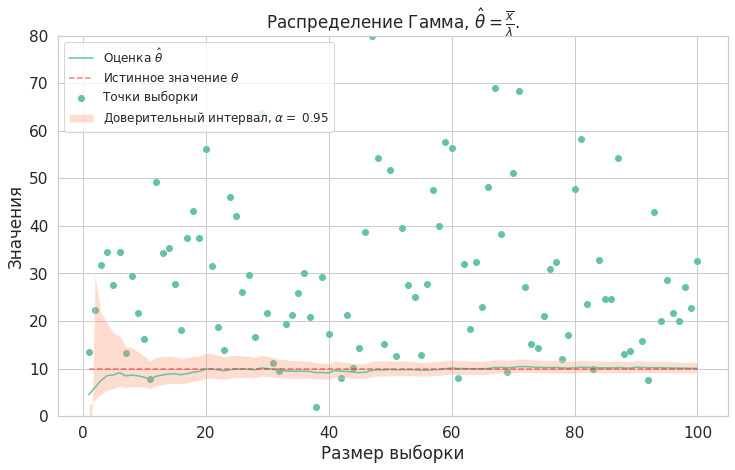

In [ ]:
theta = 10
lam = 3
gamma = sps.gamma(scale=theta, a=lam).rvs(N)
mean = (np.cumsum(gamma) / n) 
lower_bound = mean / (sps.norm(0, 1).ppf((1 + alpha) / 2) * np.sqrt(lam / n) + lam)
upper_bound = mean / (sps.norm(0, 1).ppf((1 - alpha) / 2) * np.sqrt(lam / n) + lam)
draw_confidence_interval(gamma, mean / lam, lower_bound, upper_bound)
plt.title(r'Pаспределение Гамма, $\hat{\theta} = \frac{\overline{x}}{\lambda}$.')
plt.ylim(0, 80)

**Вывод:** доверительный интервал является двусторонним, но несимметричным относительно оценки.

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__ построим доверительный интрвал для распределения бернули уровня доверия $\alpha = 0.95$.
$$
\alpha = P \left( \overline{x} - \sqrt{\frac{\overline{x}(1 - \overline{x})}{n}} N_{\frac{1 + \alpha}{2}} \leq \theta \leq \overline{x} - \sqrt{\frac{\overline{x}(1 - \overline{x})}{n}} N_{\frac{1 - \alpha}{2}} \right).
$$

In [ ]:
print(sps.norm(0, 1).ppf((1 + alpha) / 2))

1.959963984540054


$N_{\frac{1 - \alpha}{2}} \approx$ 1.96, при этом, так как это распредление Бернулли, то $\overline{x}(1 - \overline{x}) = \frac{1}{4}$.\
Значит, ширина полуинтервала равна $\frac{0,5 \cdot 1,96}{\sqrt{n}} \approx \frac{1}{\sqrt{n}}$. Так как рассматривается интервал уровня  доверия $\alpha = 0.95$, то $\frac{1}{\sqrt{n}} \leq 10^{-3} \Rightarrow n \geq10^{6}.$


In [ ]:
n = 100
k = 1000000  #количество выборок

### Равномерное распределение

In [ ]:
theta = 10
samples = sps.uniform(0, theta).rvs((k, n))
estimations = np.max(samples, axis=1)
lower_bound = estimations * (((1 + alpha) / 2) ** (-1 / n))
upper_bound = estimations * (((1 - alpha) / 2) ** (-1 / n))
probability = np.logical_and(lower_bound <= theta, theta <= upper_bound).sum() / k
print('Вероятность: ', np.round(probability, 2))

Вероятность:  0.95


### Распределение Коши

In [ ]:
theta = 10
samples = sps.cauchy(theta).rvs((k, n))
median = np.median(samples, axis=1) 
lower_bound = median - (np.pi / (2 * (n ** 0.5))) * sps.norm(0, 1).ppf((1 + alpha) / 2) 
upper_bound = median - (np.pi / (2 * (n ** 0.5))) * sps.norm(0, 1).ppf((1 - alpha) / 2) 
probability = np.logical_and(lower_bound <= theta, theta <= upper_bound).sum() / k
print('Вероятность: ', np.round(probability, 2))

Вероятность:  0.95


### Распределение Пуассона

In [ ]:
theta = 10
samples = sps.poisson(theta).rvs((k, n))
mean = np.mean(samples, axis=1)
lower_bound = mean - sps.norm(0, 1).ppf((1 + alpha) / 2) * ((theta / n) ** 0.5) 
upper_bound = mean - sps.norm(0, 1).ppf((1 - alpha) / 2) * ((theta / n) ** 0.5) 
probability = np.logical_and(lower_bound <= theta, theta <= upper_bound).sum() / k
print('Вероятность: ', np.round(probability, 2))

Вероятность:  0.95


### Гамма-распределение

In [ ]:
theta = 10
lam = 3
gamma = sps.gamma(scale=theta, a=lam).rvs((k, n))
mean = np.mean(gamma, axis=1)
lower_bound = mean / (sps.norm(0, 1).ppf((1 + alpha) / 2) * np.sqrt(lam / n) + lam)
upper_bound = mean / (sps.norm(0, 1).ppf((1 - alpha) / 2) * np.sqrt(lam / n) + lam)

probability = np.logical_and(lower_bound <= theta, theta <= upper_bound).sum() / k
print('Вероятность: ', np.round(probability, 2))

Вероятность:  0.95


Сделайте выводы.\
Во всех случаях вероятность попадания в интрвал составляет $0.95,$что совпадает с его уровнем доверия. Это подтверждает то, что доверительный интервал построен правильно.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

В качестве оценки $a$ возьмём выборочное среднее $\overline{x}$, а для оценки $\sigma^2\,-$ исправленную выборочную дисперсию: $S^2 = \frac{1}{n - 1} \sum_{i = 1}^n (x_i - \overline{x})^2.$\
Рассмотрим статистику $\frac{\overline{x} - a}{\sqrt{\frac{S^2}{n}}} \sim t(n-1)$, имеющую распределние Стюдента, независящего от $a$ и $\sigma^2$.
Построим доверительный интервал уровня $\alpha$ для $a$:
$$
\alpha = P \left ( t_{\frac{1 - \alpha}{2}} \leq \frac{\overline{x} - a}{\sqrt{\frac{S^2}{n}}} \leq t_{\frac{1 + \alpha}{2}} \right) = P \left (\overline{x} - t_{\frac{1 + \alpha}{2}} \sqrt{\frac{S^2}{n}} \leq a \leq \overline{x} - t_{\frac{1 - \alpha}{2}} \sqrt{\frac{S^2}{n}} \right ),
$$
где $t_{\frac{1 - \alpha}{2}}, \, t_{\frac{1 + \alpha}{2}}\,-$ $\frac{1 - \alpha}{2},\, \frac{1 + \alpha}{2}$-квантили распределения $t(n -1 )$.

По ЦПТ: $\sqrt{n}\frac{\overline{x} - a}{\sqrt{S^2}} \xrightarrow{d} \xi \sim N(0,1)$
Построим асимптотический доверительный интервал:
$$
\alpha =  P \left ( N_{\frac{1-\alpha}{2}} \leq \sqrt{n}\frac{\overline{x} - a}{\sqrt{S^2}} \leq  N_{\frac{1+\alpha}{2}}\right ) = P \left ( \overline{x} - \sqrt{\frac{S^2}{n}}N_{\frac{1+\alpha}{2}} \leq a \leq  \overline{x} - \sqrt{\frac{S^2}{n}}N_{\frac{1-\alpha}{2}}\right ),
$$
где $N_{\frac{1 - \alpha}{2}}, \, N_{\frac{1 + \alpha}{2}}\,-$ $\frac{1 - \alpha}{2},\, \frac{1 + \alpha}{2}$-квантили распределения $N(0,1)$.

In [ ]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    n = sample.shape[0]
    mean = np.mean(sample)
    variance = np.sum((sample - mean) ** 2) / (n - 1)
    conf_interval = np.array([
        mean - sps.t(n - 1).ppf((1 + alpha) / 2) * ((variance / n) ** 0.5),
        mean - sps.t(n - 1).ppf((1 - alpha) / 2) * ((variance / n) ** 0.5)
    ])
    return conf_interval

In [ ]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    n = sample.shape[0]
    mean = np.mean(sample)
    variance = np.sum((sample - mean) ** 2) / (n - 1)
    asymptotic_conf_interval = np.array([
        mean - sps.norm(0, 1).ppf((1 + alpha) / 2) * ((variance / n) ** 0.5),
        mean - sps.norm(0, 1).ppf((1 - alpha) / 2) * ((variance / n) ** 0.5)
    ])
    return asymptotic_conf_interval

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: R

Text(0, 0.5, 'Предполагаемые значения $a$')

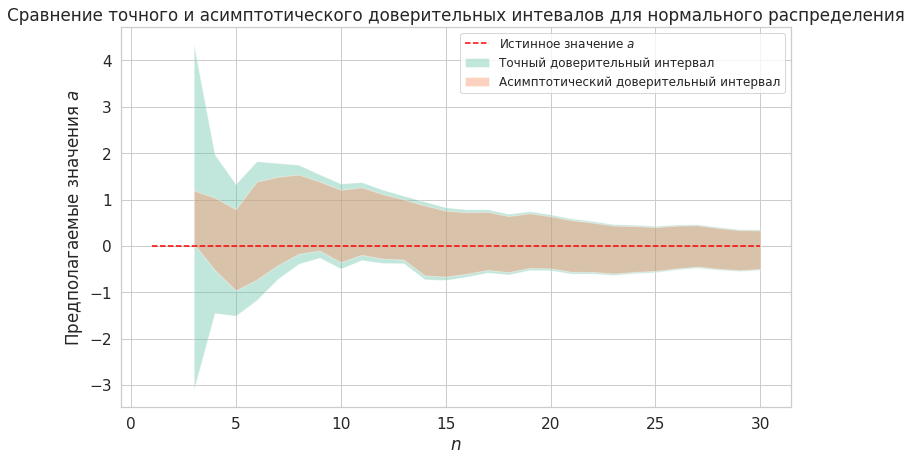

In [ ]:
a = 0
n = 30

sample = sps.norm(a).rvs(n)
conf_interval_lower = [calculate_conf_interval(sample[:i])[0] for i in range(n)]
conf_interval_upper = [calculate_conf_interval(sample[:i])[1] for i in range(n)]
asymptotic_conf_interval_lower = [calculate_asymptotic_conf_interval(sample[:i])[0] for i in range(n)]
asymptotic_conf_interval_upper = [calculate_asymptotic_conf_interval(sample[:i])[1] for i in range(n)]

plt.figure(figsize=(12,7))
plt.fill_between(np.arange(1, n + 1), conf_interval_lower, conf_interval_upper, alpha=0.4, label='Точный доверительный интервал')
plt.fill_between(np.arange(1, n + 1), asymptotic_conf_interval_lower, asymptotic_conf_interval_upper, alpha=0.4, label='Асимптотический доверительный интервал')
plt.plot(np.arange(1, n + 1), np.zeros(n) + a, label=r'Истинное значение $a$', color='red', linestyle='--')
plt.legend(fontsize=12)
plt.title('Сравнение точного и асимптотического доверительных интевалов для нормального распределения')
plt.xlabel(r'$n$')
plt.ylabel(r'Предполагаемые значения $a$')

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

Асимптотический интервал меньше точного при небольших выборках, однако при увеличении размера выборки они совпаадют. Асимптотический интверал уместно использовать вместо точного в случае поиска интервала малого размера на большой выборке.

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [ ]:
!gdown 1DE7zVPsfSk8hyEdWRf4WPr3I0w5GUOpp

Downloading...
From: https://drive.google.com/uc?id=1DE7zVPsfSk8hyEdWRf4WPr3I0w5GUOpp
To: /content/city_day.csv
100% 2.57M/2.57M [00:00<00:00, 146MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [ ]:
data =  pd.read_csv('city_day.csv', parse_dates=['Date'])[['City', 'Date', 'AQI']]
data = data.dropna().reset_index(drop=True)

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [ ]:
data['Year'] = data['Date'].dt.strftime("%Y")
data['Month'] = data['Date'].dt.strftime("%m")
data['Year-Month'] = data['Date'].dt.strftime("%Y-%m")
print(data)

                City       Date    AQI  Year Month Year-Month
0          Ahmedabad 2015-01-29  209.0  2015    01    2015-01
1          Ahmedabad 2015-01-30  328.0  2015    01    2015-01
2          Ahmedabad 2015-01-31  514.0  2015    01    2015-01
3          Ahmedabad 2015-02-01  782.0  2015    02    2015-02
4          Ahmedabad 2015-02-02  914.0  2015    02    2015-02
...              ...        ...    ...   ...   ...        ...
24845  Visakhapatnam 2020-06-27   41.0  2020    06    2020-06
24846  Visakhapatnam 2020-06-28   70.0  2020    06    2020-06
24847  Visakhapatnam 2020-06-29   68.0  2020    06    2020-06
24848  Visakhapatnam 2020-06-30   54.0  2020    06    2020-06
24849  Visakhapatnam 2020-07-01   50.0  2020    07    2020-07

[24850 rows x 6 columns]


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [ ]:
mumbai = (data[data['City'] == 'Mumbai'])[data['Date'] >= '2018-07-01'].reset_index(drop=True)
kolkata = (data[data['City'] == 'Kolkata'])[data['Date'] >= '2018-07-01'].reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [ ]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года.""" 
    df_year = df[df['Year'].astype(int) == year]
    df_month = df_year[df['Month'].astype(int) == month]
    aqi = np.array(df_month['AQI'])
    return aqi

In [ ]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    n = sample.shape[0]

    ind = np.random.randint(0, n, (k, n))
    k_samples = sample[ind]
    return k_samples
    

In [ ]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    
    estimations = sorted(estimator(sample))
    k = sample.shape[0]
    interval = np.array([
        estimations[int((k * (1 + alpha) - (k * (1 + alpha)) % 2) / 2)],
        estimations[int((k * (1 - alpha) + (k * (1 - alpha)) % 2) / 2)]
    ])
    return interval

In [ ]:
mumbai_intervals = []
kolkata_intervals = []
for df, intervals in zip([mumbai, kolkata],
                        [mumbai_intervals, kolkata_intervals]):
  df = df[df['Date'] <= '2020-06-30']
  date = df['Year-Month'].unique()

  for i in date:
    samples = get_bootstrap_samples(get_dataset_by_month(df, int(i[:4]), int(i[5:])))
    intervals.append(bootstrap_conf_interval(samples))

mumbai_intervals = np.array(mumbai_intervals)
kolkata_intervals = np.array(kolkata_intervals)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

Text(0, 0.5, 'AQI')

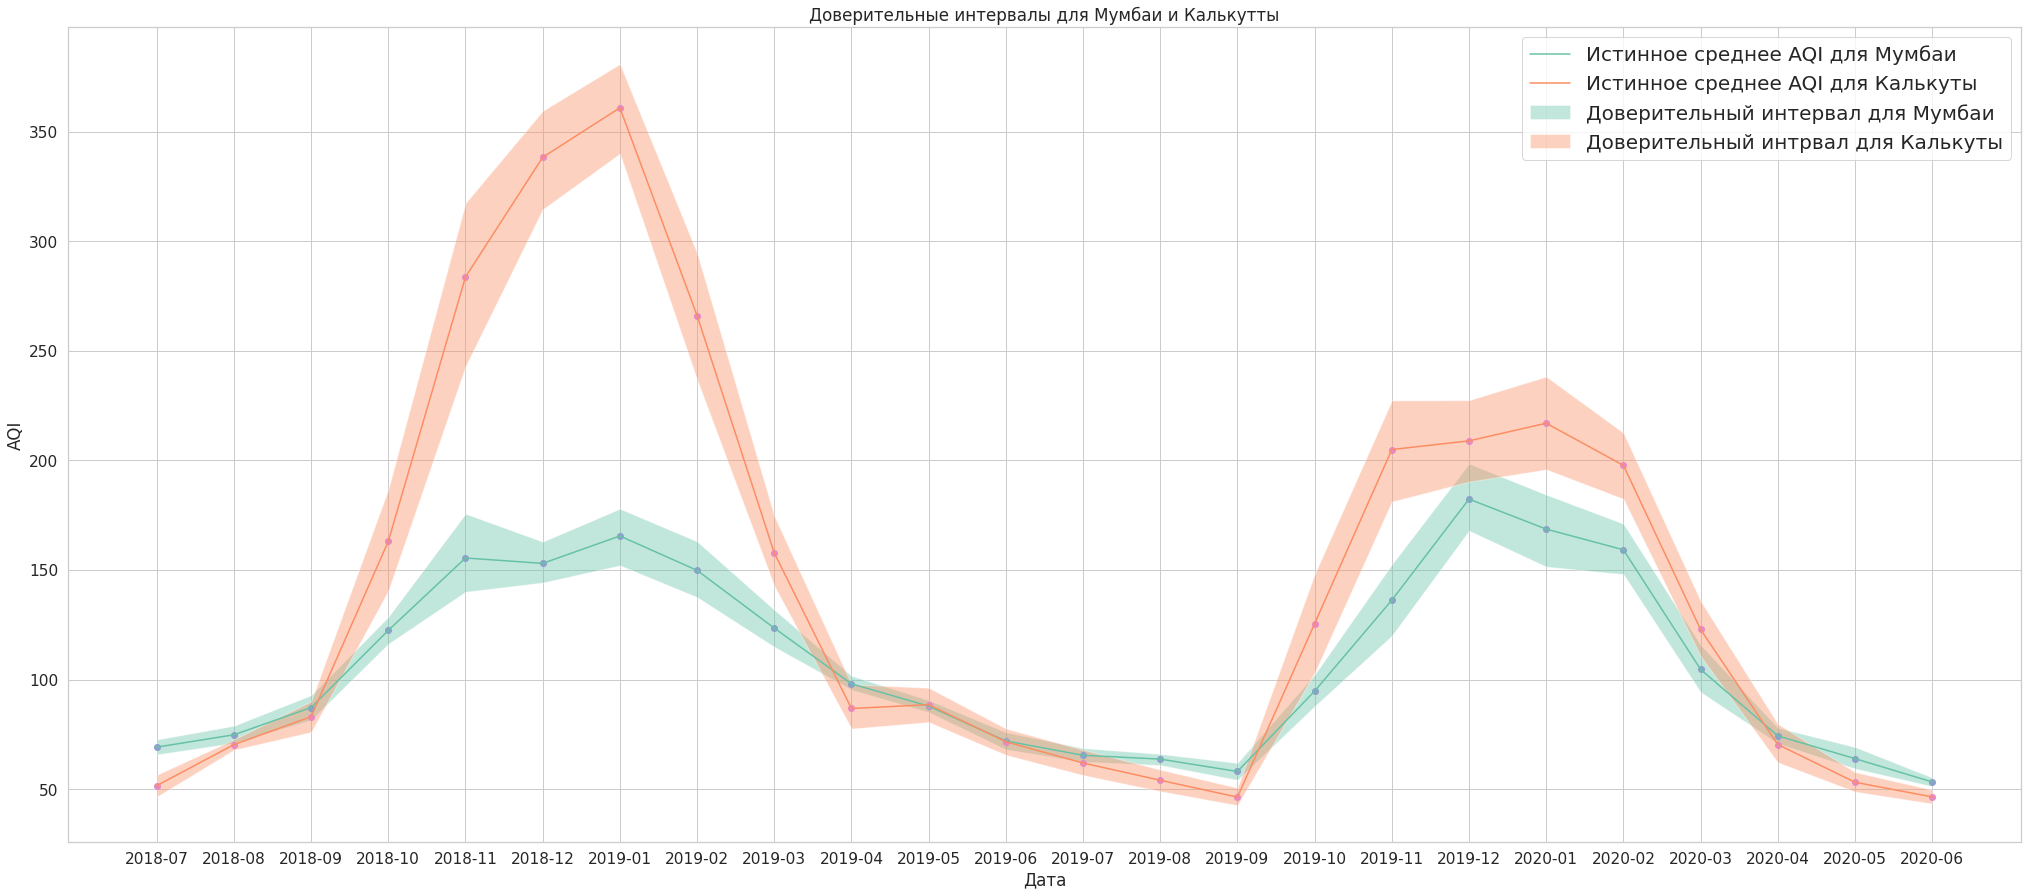

In [ ]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 

mumbai_lower = [mumbai_intervals[i][1] for i in range(mumbai_intervals.shape[0])]
mumbai_upper = [mumbai_intervals[i][0] for i in range(mumbai_intervals.shape[0])]
kolkata_lower = [kolkata_intervals[i][1] for i in range(kolkata_intervals.shape[0])]
kolkata_upper = [kolkata_intervals[i][0] for i in range(kolkata_intervals.shape[0])]

plt.figure(figsize=(35,15))
plt.fill_between(labels, mumbai_lower, mumbai_upper, alpha=0.4, label='Доверительный интервал для Мумбаи')
plt.fill_between(labels, kolkata_lower, kolkata_upper, alpha=0.4, label='Доверительный интрвал для Калькуты')
plt.scatter(labels, mumbai[mumbai['Date'] <= '2020-06-30'].groupby(['Year-Month']).mean())
plt.plot(labels, mumbai[mumbai['Date'] <= '2020-06-30'].groupby(['Year-Month']).mean(), label='Истинное среднее AQI для Мумбаи')
plt.scatter(labels, kolkata[kolkata['Date'] <= '2020-06-30'].groupby(['Year-Month']).mean())
plt.plot(labels, kolkata[kolkata['Date'] <= '2020-06-30'].groupby(['Year-Month']).mean(), label='Истинное среднее AQI для Калькуты')
plt.title('Доверительные интервалы для Мумбаи и Калькутты')
plt.legend(fontsize=20)
plt.xlabel('Дата')
plt.ylabel('AQI')

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

На получившимся графике можно проследить закономерность: в летние месяцы уровень AQI меньше, чем в остальные, что говорит об улучшении качества воздуха летом. Это можно объяснить тем, что в это время в рассматриваемых городах наблюдается сезон муссонных дождей: https://ru.wikipedia.org/wiki/Климат_Индии#Сезон_дождей .

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, 'Сравнение качества воздуха в Мумбаи в апреле 2019 и апреле 2020 годов')

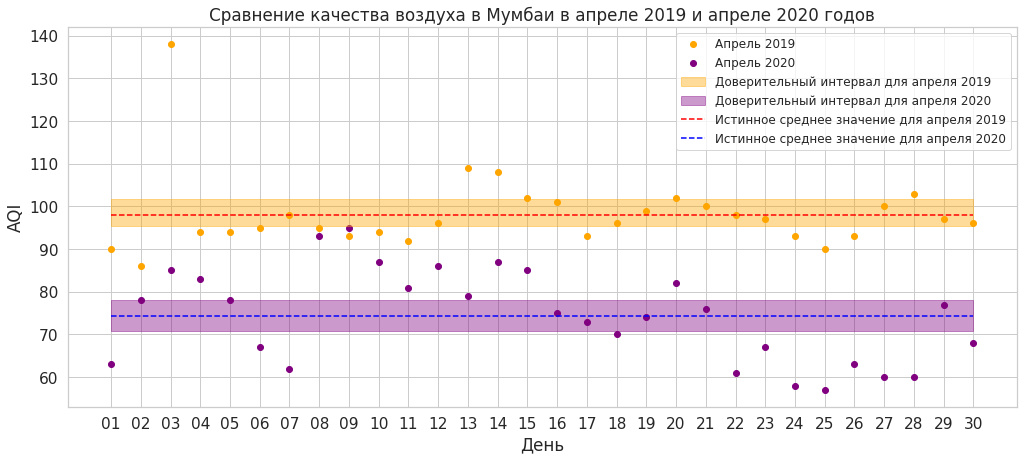

In [ ]:
df_mumbai = pd.DataFrame()
df_mumbai['Date'] = date
df_mumbai['Upper'] = [mumbai_intervals[i][0] for i in range(mumbai_intervals.shape[0])]
df_mumbai['Lower'] = [mumbai_intervals[i][1] for i in range(mumbai_intervals.shape[0])]

df_mumbai_2019 = (mumbai[mumbai['Month'] == '04'])[mumbai['Year'] == '2019'].reset_index(drop=True)
df_mumbai_2019['Day'] = df_mumbai_2019['Date'].dt.strftime("%d")
df_mumbai_2020 = (mumbai[mumbai['Month'] == '04'])[mumbai['Year'] == '2020'].reset_index(drop=True)

plt.figure(figsize=(17,7))
plt.scatter(df_mumbai_2019['Day'], df_mumbai_2019['AQI'], color='orange', label='Апрель 2019')
plt.scatter(df_mumbai_2019['Day'], df_mumbai_2020['AQI'], color='purple', label='Апрель 2020')
plt.fill_between(df_mumbai_2019['Day'], (df_mumbai[df_mumbai['Date'] == '2019-04'])['Lower'], (df_mumbai[df_mumbai['Date'] == '2019-04'])['Upper'], alpha=0.4, color='orange', label='Доверительный интервал для апреля 2019')
plt.fill_between(df_mumbai_2019['Day'],(df_mumbai[df_mumbai['Date'] == '2020-04'])['Lower'], (df_mumbai[df_mumbai['Date'] == '2020-04'])['Upper'], alpha=0.4, color='purple', label='Доверительный интервал для апреля 2020')
plt.hlines(df_mumbai_2019['AQI'].mean(), df_mumbai_2019['Day'][0], df_mumbai_2019['Day'][29], color='red', linestyle='--', label='Истинное среднее значение для апреля 2019')
plt.hlines(df_mumbai_2020['AQI'].mean(), df_mumbai_2019['Day'][0], df_mumbai_2019['Day'][29], color='blue', linestyle='--', label='Истинное среднее значение для апреля 2020')
plt.legend(fontsize=12)
plt.xlabel('День')
plt.ylabel('AQI')
plt.title('Сравнение качества воздуха в Мумбаи в апреле 2019 и апреле 2020 годов')

Теперь проделайте то же самое для Калькутты

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, 'Сравнение качества воздуха в Калькутте в апреле 2019 и апреле 2020 годов')

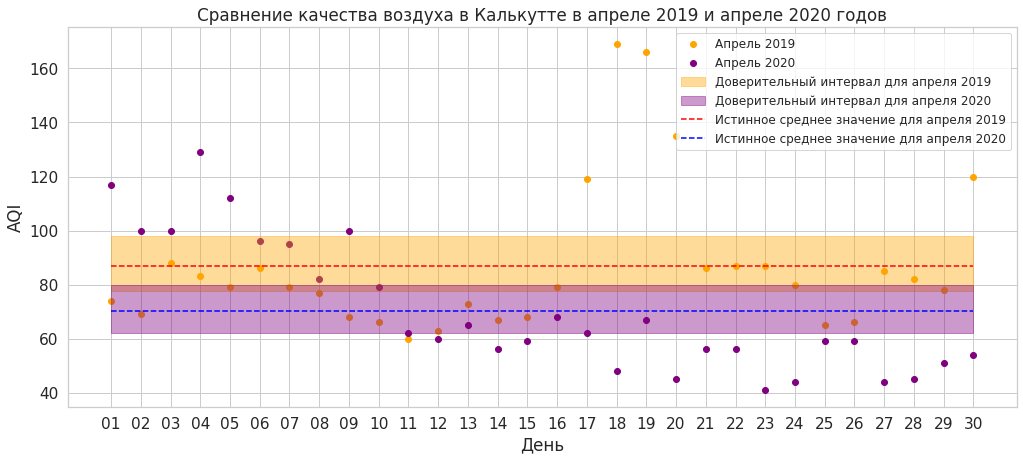

In [ ]:
df_kolkata = pd.DataFrame()
df_kolkata['Date'] = date
df_kolkata['Upper'] = [kolkata_intervals[i][0] for i in range(kolkata_intervals.shape[0])]
df_kolkata['Lower'] = [kolkata_intervals[i][1] for i in range(kolkata_intervals.shape[0])]

df_kolkata_2019 = (kolkata[kolkata['Month'] == '04'])[kolkata['Year'] == '2019'].reset_index(drop=True)
df_kolkata_2019['Day'] = df_kolkata_2019['Date'].dt.strftime("%d")
df_kolkata_2020 = (kolkata[kolkata['Month'] == '04'])[kolkata['Year'] == '2020'].reset_index(drop=True)

plt.figure(figsize=(17,7))
plt.scatter(df_kolkata_2019['Day'], df_kolkata_2019['AQI'], color='orange', label='Апрель 2019')
plt.scatter(df_kolkata_2019['Day'], df_kolkata_2020['AQI'], color='purple', label='Апрель 2020')
plt.fill_between(df_kolkata_2019['Day'], (df_kolkata[df_kolkata['Date'] == '2019-04'])['Lower'], (df_kolkata[df_kolkata['Date'] == '2019-04'])['Upper'], alpha=0.4, color='orange', label='Доверительный интервал для апреля 2019')
plt.fill_between(df_kolkata_2019['Day'],(df_kolkata[df_kolkata['Date'] == '2020-04'])['Lower'], (df_kolkata[df_kolkata['Date'] == '2020-04'])['Upper'], alpha=0.4, color='purple', label='Доверительный интервал для апреля 2020')
plt.hlines(df_kolkata_2019['AQI'].mean(), df_kolkata_2019['Day'][0], df_kolkata_2019['Day'][29], color='red', linestyle='--', label='Истинное среднее значение для апреля 2019')
plt.hlines(df_kolkata_2020['AQI'].mean(), df_kolkata_2019['Day'][0], df_kolkata_2019['Day'][29], color='blue', linestyle='--', label='Истинное среднее значение для апреля 2020')
plt.legend(fontsize=12)
plt.xlabel('День')
plt.ylabel('AQI')
plt.title('Сравнение качества воздуха в Калькутте в апреле 2019 и апреле 2020 годов')

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

На обоих графиках наблюдается закономерность: воздух в апреле 2020 года чище, чем в апреле 2019. Это может быть связнано с тем, что 24 марта 2020 года в Индии объявили каранатин всвязи с пандемией короновируса:
*   https://ru.wikipedia.org/wiki/Распространение_COVID-19_в_Индии
*   https://www.gismeteo.by/news/klimat/36669-indeks-kachestva-vozduha-v-deli-vpervye-za-neskolko-desyatkov-let-dostig-pokazatelya-horoshiy/
